# Marketing Mix Model
This project shows a simple marketing mix model, which is a statistical analysis on sales and measures the impact of different channels that have effect on sales. 
## Dataset
Dataset shape: 200 rows x 6 columns
## Independent variables and dependent variable
- Independent variables: TV, Radio, Newspaper
- Dependent variable: Sales


First, we import the data into our notebook:

In [52]:
import pandas as pd
import requests
import io
    
# Downloading the csv file from GitHub
url = "https://raw.githubusercontent.com/leopoldavezac/BayesianMMM/main/data/mmm.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [4]:
# Retrieve the first 10 rows of the dataframe
print (df.head(10)) 

      week_dt     TV  radio  newspaper  sales  consumer_index
0  2016-09-01  230.1   37.8       69.2   22.1        3.118934
1  2016-09-08   44.5   39.3       45.1   10.4        3.772289
2  2016-09-15   17.2   45.9       69.3    9.3        6.602882
3  2016-09-22  151.5   41.3       58.5   18.5        4.252269
4  2016-09-29  180.8   10.8       58.4   12.9        4.768575
5  2016-10-06    8.7   48.9       75.0    7.2        4.905612
6  2016-10-13   57.5   32.8       23.5   11.8        2.981743
7  2016-10-20  120.2   19.6       11.6   13.2        4.956583
8  2016-10-27    8.6    2.1        1.0    4.8        2.378291
9  2016-11-03  199.8    2.6       21.2   10.6        2.320300


In [7]:
# Get the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   week_dt         200 non-null    object 
 1   TV              200 non-null    float64
 2   radio           200 non-null    float64
 3   newspaper       200 non-null    float64
 4   sales           200 non-null    float64
 5   consumer_index  200 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


## Data exploration

<AxesSubplot:>

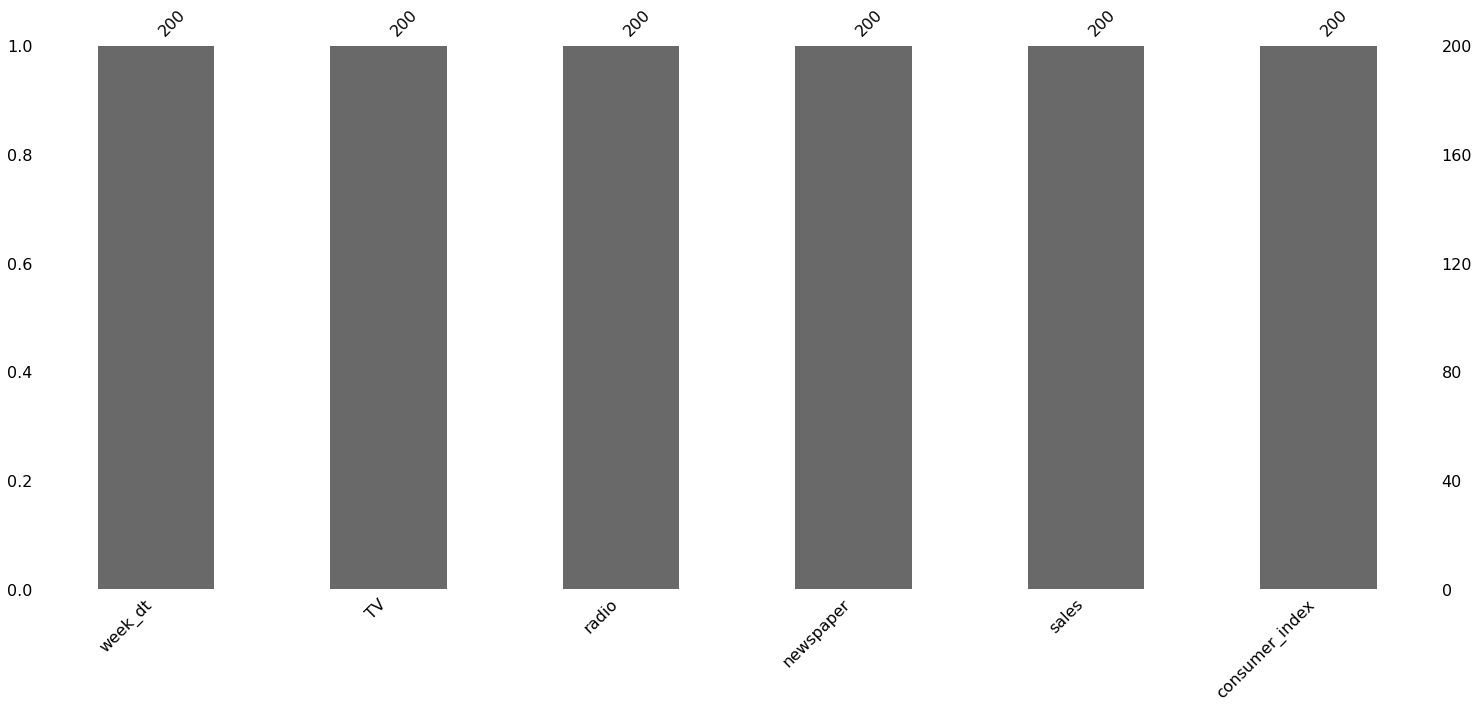

In [8]:
import seaborn as sns
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt

# Check non-missing data for each variables
msno.bar(df)

<function matplotlib.pyplot.show(close=None, block=None)>

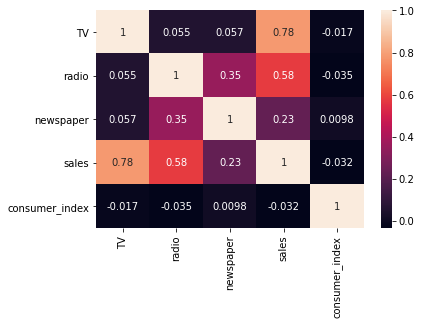

In [54]:
# Build the heatmap that represents the correlation between variables in the dataframe
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show

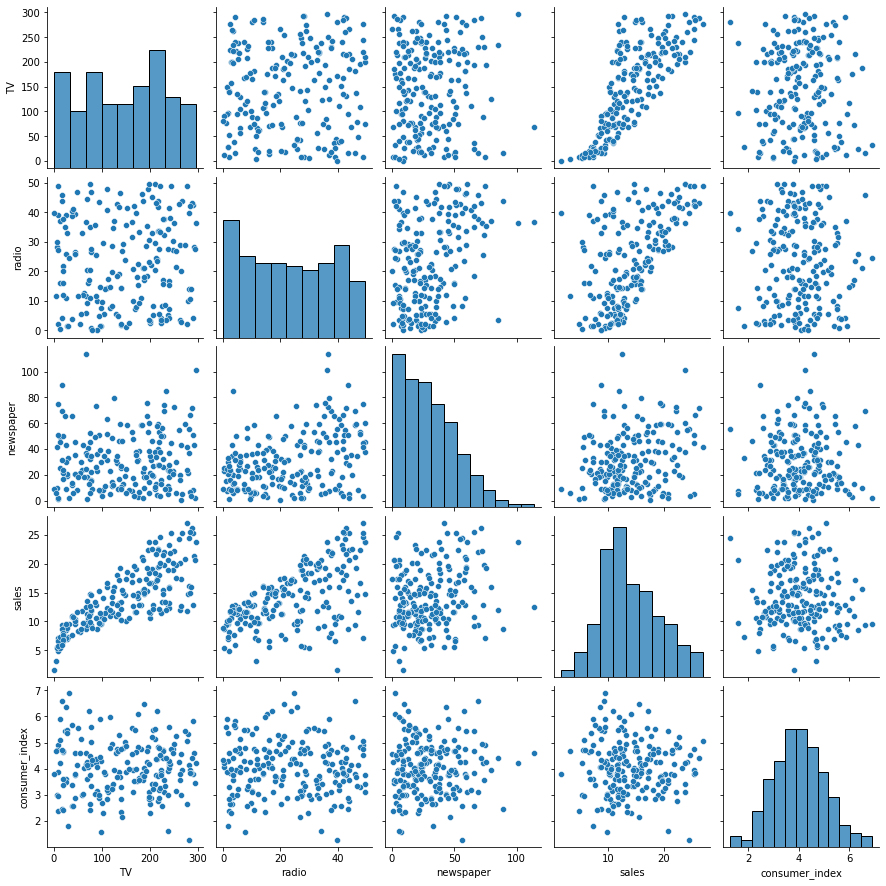

In [14]:
sns.pairplot(df)

From the plots above, it seems our dataset does not show clear multicollinearity, which is a statistical concept where several independent variables in a model are correlated. To check the multicollinearity, we can also use VIF score, an independent variable represents how well the variable is explained by other independent variables.

VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

By calculating the VIF as below, we can confirm that our dataset does not have high multicollinearity

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['TV', 'radio', 'newspaper']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0         TV  2.486772
1      radio  3.285462
2  newspaper  3.055245


## Building model

In [20]:
# Slice the dataframe based on our defined independent variables
df = df[['TV', 'radio', 'newspaper','sales']]

In [27]:
# Setting X and y variables
X = df.loc[:, df.columns != 'sales']
y = df['sales']

<AxesSubplot:>

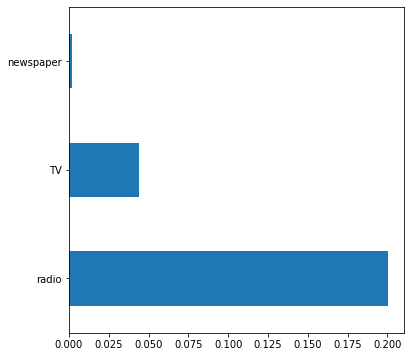

In [61]:
# Determine the importance of each independent variable
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
model_reg = LinearRegression()
# Fit the model
model_reg.fit(X_train, y_train)
# Get the importance
importance = model_reg.coef_
# Visualizing the feature importance
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',figsize=(6,6))

In [63]:
# Estimate the regression 
import statsmodels.formula.api as sm
model_reg = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        16:00:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

## Interpretation
R-Squared is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. 

Achieving R-squared at 0.897, it can be inpreted that 87.9% of the variability observed in the sales is explained by the regression model with the formula: sales ~ 1(2.9389) + TV(0.0458) + Radio(0.1885)+ Newspaper(-0.0010)

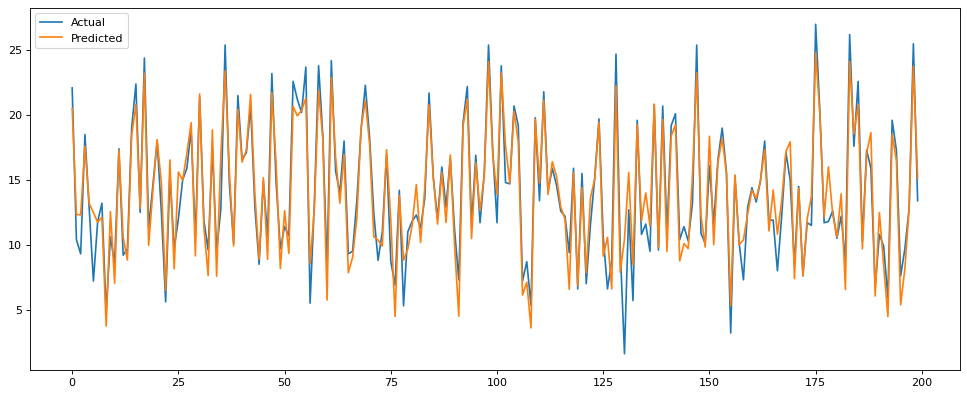

In [60]:
# Defining Actual and Predicted values
y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()
# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()